# 統計指標實作範例
## 常見於迴歸問題的評估指標
* 平均絕對誤差 - Mean Absolute Error (MAE)
* 平均平方誤差(均方差) - Mean Squared Error (MSE)

## 常見於分類問題的指標
* Binary Cross Entropy (CE)

##### 後面的課程還會有更詳細的說明

In [1]:
# import 是 Python 載入套件的基本語法 (類似 C 語言的 include), 後面接要載入的套件
# import AAAAA as BB, 其中 BB 是代稱, 表示除了載入 AAAAA 之外, 之後都可以用 BB 代替 AAAAA 這個名稱
# 常用套件往往有其對應代稱, numpy的代稱是np, pandas的代稱是pd, matplotlib.pyplot的代稱是plt
# numpy 常用於數值/陣列運算, pandas 擅長資料格式的調整, matplotlib 擅長繪圖
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.randn(101)

array([ 0.42014315,  1.23567801,  0.20790086, -0.69562905,  0.1044904 ,
        0.30060733, -0.58010989,  1.00638043, -1.3826236 , -0.63911026,
       -0.07979106, -0.43764286, -0.10221498, -0.37668918,  0.78553216,
        1.03178695, -1.33579797,  1.89635216, -0.31007141, -1.14814057,
        0.67746825,  0.32621119, -0.94088059,  0.33559305, -1.45601942,
        1.948299  , -0.52617767,  0.5237765 ,  0.53830349,  1.62604934,
       -0.527226  , -1.1241029 ,  0.55578578, -0.39528578,  0.48797588,
       -1.96449284, -1.03531792,  1.36775542,  0.49232785, -0.87836689,
        0.11231087, -0.41179522, -1.05516952,  1.46236245,  0.57543606,
       -1.13233422,  1.21752648,  0.36367131,  1.25589977, -0.17554318,
        0.75550065, -0.61496978, -0.93364731, -0.4950217 ,  0.12893404,
       -1.92389602,  0.66310009, -0.48930577,  0.11339978,  0.38785296,
       -1.24071451, -0.39396619, -0.02786862, -0.7660294 , -0.62293618,
       -2.72292898, -0.12904781,  0.08217799,  0.32796959,  0.64

<function matplotlib.pyplot.show(*args, **kw)>

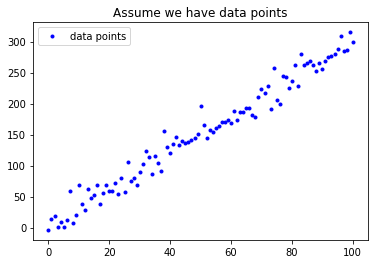

In [2]:
# Python 的變數不須宣告, 可能是文字, 數值, 陣列, 甚至是物件, 對初學者來說這往往是最難接受的地方
# 主要是 Python 在大多數情況下, 可以由運算"猜"出你想要的型態, 我們由下列語法看看發生了什麼事吧
# w, b 是數值
w = 3
b = 0.5

# np.linspace(0, 100, 101)是指 0~100 劃分成 101 個刻度(含頭尾), 所也就是 0, 1, 2,...,100 這 101 個數
# 這時候, x_lin 因為要記錄不只一個數, 因為 np.linspace() 傳回的是一個 Array, 所以 x_lin 就變成 Array 了
x_lin = np.linspace(0 ,100, 101)

# np.random.randn() 就是 numpy.random.randn(), 會隨機傳回標準常態分布的取樣值
# np.random.randn(101) 表示取樣了101次, 型態是 Array, 所以其他 + 與 * 的部分都是 Array 的加與乘, 一行就計算了101筆資料
# 所以最後的結果 y, 也是一個長度 101 的 Array
y = (x_lin + np.random.randn(101) * 5) * w + b

# 這邊就是將 x_lin 以及剛剛算完的 y, 當作座標值, 將101個點在平面上畫出來
# b. : b 就是 blue, 點(.) 就是最小單位的形狀, 詳細可以查 matplotlib 的官方說明
plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show

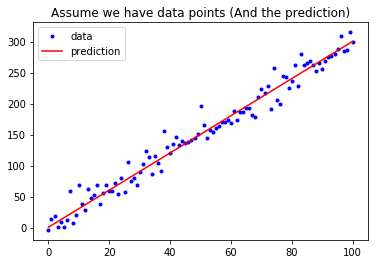

In [4]:
# 這邊的 y_hat, 就沒有隨機的部分了, 也就是下圖中的紅色實線部分
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
# 上面的 'b.' 是藍色點狀, 下面的 'r-' 是紅色線狀, label 是圖示上的名稱
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [5]:
def mean_absolute_error(y, yp):
    
    
    
    ## MAE : 將兩個陣列相減後, 取絕對值(abs), 再將整個陣列加總成一個數字(sum), 最後除以y的長度(len), 因此稱為"平均絕對誤差"
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

# 呼叫上述函式, 傳回 y(藍點高度)與 y_hat(紅線高度) 的 MAE
MAE = mean_absolute_error(y, y_hat)
print("The mean abosulte error is %.3f" % (MAE))

The mean abosulte error is 11.305


## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

In [9]:
def mean_square_error(y, yp):
    
    
    
    ## MAE : 將兩個陣列相減後, 取平方, 再將整個陣列加總成一個數字(sum), 最後除以y的長度(len), 因此稱為"方均誤差"
    mse = MSE = sum((y - yp)**2) / len(y)
    return mse

In [10]:
# 呼叫上述函式, 傳回 y(藍點高度)與 y_hat(紅線高度) 的 MSE
MSE = mean_square_error(y, y_hat)
print("The mean square error is %.3f" % (MSE))

The mean square error is 225.943


作業2：申論題目可直接將答案回覆在HW檔案裡面，Jupyter notebook可直接編輯文字。

請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：

1. 你選的這組資料為何重要

2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)

3. 蒐集而來的資料型態為何

4. 這組資料想解決的問題如何評估

作業3：申論題目可直接將答案回覆在HW檔案裡面，Jupyter notebook可直接編輯文字。

想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：

1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」) : 如何提升車隊的載客量

2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集) 商業區與住宅區分布, 房價, 交通流量 

3. 蒐集而來的資料型態為何 數值,類別型

4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證) 觀察不同區域的載客比率(空車率), 找出閒置車輛有利於調派到需求高的區域